In [1]:
%matplotlib widget
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

In [2]:
# Set energy, mass, theta, and tau ranges

Estep = 5.000e+07
Emin = 2.500e+07
Emax = 6.475e+09
Erange = np.arange(Emin,Emax+Estep,Estep)

mstep = 0.1
mmin = 0
mmax = 5.00
mrange = np.arange(mmin,mmax+mstep,mstep)

tstep = 0.05
tmin = 0.0
tmax = 1.0
trange = np.arange(tmin,tmax+tstep,tstep)

cstep = 0.25
cmin = 0
cmax = 9.5
crange = np.arange(cmin,cmax+cstep,cstep)

In [3]:
with open("fluxratios.npy", 'rb') as f:
    fluxratios = np.load(f).astype("float64")

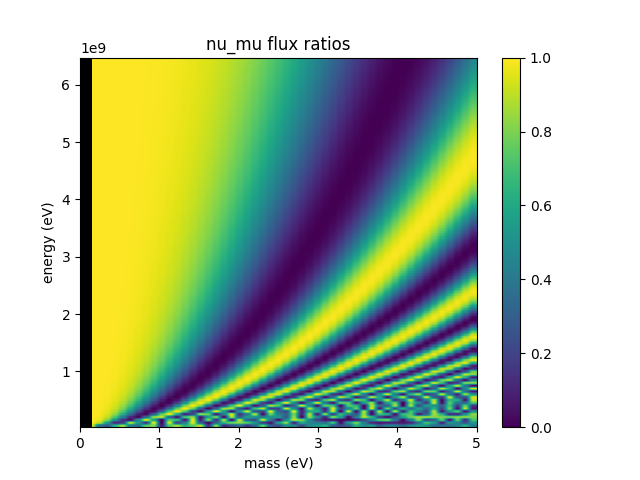

In [7]:
def plotratio(fluxratios, xaxis, yaxis, indices):
    '''
    Function to plot a single instance given flux ratios, xaxis, yaxis, and indices for other values
    '''
    fluxratios = np.take(fluxratios, indices[4], axis = 4) # Choose a particle type
    T = [0,1,2,3] 
    if xaxis == yaxis: # Can't plot same axis
        print("Choose different variables to plot")
        return 0
    if xaxis>yaxis: # ensure xaxis is smaller for consistancy 
        xaxis, yaxis = yaxis, xaxis
    T.remove(xaxis) 
    T.remove(yaxis) # T is axes to remove
    r1, r2 = T
    fluxratios = np.take(fluxratios, indices[r1], axis = r1) # high dimensional slice out other axes
    fluxratios = np.take(fluxratios, indices[r2], axis = r2-1)
    minrange = (mmin, tmin, cmin, Emin)
    maxrange = (mmax, tmax, cmax, Emax)
    part_label = ["nu_e","anti nu_e","nu_mu","anti nu_mu"]
    labels = ["mass (eV)", "theta_24", "tau ($eV^{-1}$)", "energy (eV)"]
    plt.clf() # clear figure
    extent = minrange[xaxis], maxrange[xaxis], minrange[yaxis], maxrange[yaxis] # range of image
    cmap = copy.copy(mpl.cm.get_cmap("viridis")) 
    cmap.set_bad(color='k') # set color of nan to black
    im = plt.imshow(fluxratios.T, cmap = cmap, extent = extent, aspect = "auto", origin='lower', vmin = 0.0)
    plt.xlabel(labels[xaxis])
    plt.ylabel(labels[yaxis])
    plt.title(part_label[indices[4]]+" flux ratios")
    cb = plt.colorbar()
    #fig.savefig(f'figures/fluxratio_E{inpenergy[enindex]:.2e}.png',dpi=100, bbox_inches="tight")
    plt.show()

plotratio(fluxratios, 0, 3, [1, 20, 1, 20, 2])

In [8]:
# Set up interactive plots 
plt.ion() # Turn on interactive mode
fig, ax = plt.subplots()

# Assign interactive variables
@widgets.interact(variable1 = [("mass of sterile (eV)",0), ("theta_24",1), ("coupling; tau (eV^-1)",2), ("energy (eV)",3)],
                  variable2 = [("mass of sterile (eV)",0), ("theta_24",1), ("coupling; tau (eV^-1)",2), ("energy (eV)",3)],
                  mass=widgets.FloatSlider(min=mmin, max=mmax, step=mstep),
                  theta=widgets.FloatSlider(min=tmin, max=tmax, step=tstep),
                  coupling=widgets.FloatSlider(min=cmin, max=cmax, step=cstep),
                  Energy=widgets.IntSlider(min=Emin, max=Emax, step=Estep),
                  ptype=[('nu_e',0),('anti_nu_e',1),('nu_mu',2),('anti_nu_mu',3)])
def update(variable1 = 0, variable2 = 2, mass = 1, theta = 1, coupling = 1, Energy = 10,ptype = 2):
    """Remove old lines from plot and plot new one"""
    mindex = np.where(mrange.round(3)==mass)[0][0] # change from values to indices
    tindex = np.where(trange.round(3)==theta)[0][0]
    cindex = np.where(crange.round(3)==coupling)[0][0]
    Eindex = np.where(Erange==Energy)[0][0]
    indices = [mindex, tindex, cindex, Eindex, ptype]
    plotratio(fluxratios, variable1, variable2, indices) # Plot functions

interactive(children=(Dropdown(description='variable1', options=(('mass of sterile (eV)', 0), ('theta_24', 1),…

In [6]:
#





















#